In [1]:
import pandas as pd
import numpy as np
import importlib
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

Load saved overview of IDs, metadata (and new model predictions) and combine them with Ridge predictions + BAGs:

In [2]:
# save path for predictions
preds_path = '/ritter/share/projects/laura_riedel_thesis/predictions/'
# load data overview
data_overview_full = pd.read_csv(preds_path+'predictions_overview_100-500p.csv')
# limit to IDs present in heldout test set
data_overview_heldout = data_overview_full[data_overview_full['split']=='heldout_test'].copy()
data_overview_heldout.reset_index(inplace=True,drop=True)
# load ridge predictions
ridge_df = pd.read_csv(preds_path+'ridge_preds_100-500p.csv')
# calculate BAGs
ridge_df = utils.calculate_bag(ridge_df, models=['ridge'])
# linearly detrend BAGs
ridge_df = utils.detrend_bag(ridge_df, models=['ridge'])
# merge ridge info with overview
data_overview_heldout = data_overview_heldout.merge(ridge_df, how='outer', on=['eid','age'], copy=False)
data_overview_heldout

,eid,age,split,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,...,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new,predicted_age_ridge,bag_ridge,bag_ridge_detrended
0,1000030,65,heldout_test,21.2569,NaN,20.0,8.0,18.0,1.0,1.0,...,-0.344172,1.0,64.256958,1.0,71.693298,-0.743042,6.693298,65.442215,0.442215,1.083458
1,1000059,68,heldout_test,NaN,22.0,20.0,7.0,NaN,0.0,0.0,...,-1.093500,18.0,58.876446,18.0,58.413288,-9.123554,-9.586712,65.902210,-2.097790,0.257545
2,1000077,58,heldout_test,33.4834,18.0,19.0,3.0,48.0,NaN,NaN,...,0.260200,34.0,63.836048,34.0,66.193604,5.836048,8.193604,60.723910,2.723910,-0.634395
3,1000100,57,heldout_test,23.4552,NaN,20.0,NaN,28.0,0.0,0.0,...,-4.452460,2.0,55.072990,2.0,57.406872,-1.927010,0.406872,51.595610,-5.404390,-9.334059
4,1000202,67,heldout_test,26.6846,19.0,20.0,6.0,45.0,NaN,NaN,...,-4.424320,16.0,64.058601,16.0,67.427048,-2.941399,0.427048,62.639080,-4.360920,-2.576949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2035762,73,heldout_test,25.3688,12.0,7.0,5.0,24.0,0.0,0.0,...,-2.457690,7.0,77.852402,7.0,74.190857,4.852402,1.190857,70.628130,-2.371870,2.840285
4996,2264650,61,heldout_test,30.5389,NaN,7.0,NaN,41.0,0.0,0.0,...,-3.327250,29.0,61.950256,29.0,63.557865,0.950256,2.557865,60.719040,-0.280960,-1.925173
4997,2329354,68,heldout_test,22.5614,18.0,20.0,8.0,30.0,0.0,0.0,...,NaN,36.0,66.802460,36.0,65.315231,-1.197540,-2.684769,66.051830,-1.948170,0.407165
4998,2457356,60,heldout_test,29.6270,18.0,20.0,8.0,22.0,1.0,1.0,...,NaN,9.0,61.610027,9.0,63.635746,1.610027,3.635746,58.524540,-1.475460,-3.691037


In [3]:
true_age_corrs = viz.preds_corr_overview(data_overview_heldout, variables=False, models=['ridge'])
true_age_corrs

,True age vs.,Corr
0,Predicted age ridge model,0.667995
1,BAG ridge model,-0.762226
2,Detrended BAG ridge model,0.000579


In [4]:
variables_corrs = viz.preds_corr_overview(data_overview_heldout, variables=True, models=['ridge'])
variables_corrs

,Variable,Corr BAG ridge model,Corr detrended BAG ridge model
0,bmi,0.041941,0.050598
1,digit substitution,0.309093,-0.040593
2,education,0.051927,-0.045850
3,fluid intelligence,0.031276,-0.046152
4,grip,0.131039,0.045601
5,depressive episode,0.066166,0.013508
6,all depression,0.068684,0.013904
7,recurrent depressive disorder,0.053814,0.010894
8,multiple sclerosis,0.037442,0.023234
9,sex,-0.036003,0.067829


In [22]:
# save overviews as LaTeX table
# table_path = '../../viz/'
# true_age_corrs.to_latex(table_path+'table_true_age_corrs_ridge.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)
# variables_corrs.to_latex(table_path+'table_variables_corrs_ridge.tex',
#                          index=False,
#                          float_format='{:.4f}'.format,
#                          column_format='lrrrr',
#                          bold_rows=True)

/tmp/ipykernel_3848546/3274609115.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  true_age_corrs.to_latex(table_path+'table_true_age_corrs_ridge.tex',
/tmp/ipykernel_3848546/3274609115.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  variables_corrs.to_latex(table_path+'table_variables_corrs_ridge.tex',


Using bootstrapping for confidence interval of correlations:

In [3]:
true_age_corrs_bs, variables_corrs_bs = utils.bootstrap_pipeline(data_overview_heldout,models=['ridge'],n_iterations=2000)
true_age_corrs_bs

,True age vs.,Corr,Corr mean,Corr sem,Corr z,Corr p
0,Predicted age ridge model,0.667995,0.668152,0.008045,83.052379,0.000000
1,BAG ridge model,-0.762226,-0.762014,0.006285,-121.245468,0.000000
2,Detrended BAG ridge model,0.000579,0.001063,0.013972,0.076052,0.939378


In [4]:
variables_corrs_bs

,Variable,Corr BAG ridge model,Corr BAG ridge model mean,Corr BAG ridge model sem,Corr BAG ridge z,Corr BAG ridge p,Corr detrended BAG ridge model,Corr detrended BAG ridge model mean,Corr detrended BAG ridge model sem,Corr detrended BAG ridge z,Corr detrended BAG ridge p
0,bmi,0.041941,0.041707,0.014267,2.923376,3.462586e-03,0.050598,0.050668,0.014361,3.528121,0.000419
1,digit substitution,0.309093,0.309463,0.015778,19.614082,1.172348e-85,-0.040593,-0.040285,0.016784,-2.400163,0.016388
2,education,0.051927,0.051981,0.014049,3.699920,2.156672e-04,-0.045850,-0.046212,0.013913,-3.321622,0.000895
3,fluid intelligence,0.031276,0.031206,0.014903,2.094001,3.625986e-02,-0.046152,-0.046593,0.014487,-3.216207,0.001299
4,grip,0.131039,0.130483,0.014226,9.172050,4.641083e-20,0.045601,0.044848,0.014034,3.195675,0.001395
5,depressive episode,0.066166,0.066160,0.015079,4.387676,1.145685e-05,0.013508,0.013425,0.015100,0.889052,0.373975
6,all depression,0.068684,0.068648,0.015049,4.561499,5.078983e-06,0.013904,0.013813,0.015151,0.911725,0.361914
7,recurrent depressive disorder,0.053814,0.053500,0.016839,3.177257,1.486752e-03,0.010894,0.010905,0.018053,0.604074,0.545794
8,multiple sclerosis,0.037442,0.037288,0.017374,2.146142,3.186168e-02,0.023234,0.023298,0.016460,1.415474,0.156929
9,sex,-0.036003,-0.036327,0.014242,-2.550675,1.075144e-02,0.067829,0.067554,0.014201,4.757063,0.000002


Check partial correlations (bootstrapped)

In [5]:
# confounds: age + sex
utils.bootstrap_pipeline(data_overview_heldout,models=['ridge'],n_iterations=2000, covariates=['age','sex'])

,Variable,Corr BAG ridge model,Corr BAG ridge model mean,Corr BAG ridge model sem,Corr BAG ridge z,Corr BAG ridge p
0,bmi,0.044243,0.044274,0.014635,3.025175,0.002485
1,digit substitution,-0.041986,-0.041296,0.017315,-2.384991,0.017080
2,education,-0.049002,-0.049304,0.013805,-3.571441,0.000355
3,fluid intelligence,-0.054683,-0.054962,0.014674,-3.745415,0.000180
4,grip,-0.004852,-0.005541,0.013762,-0.402655,0.687202
5,depressive episode,0.021578,0.021345,0.014755,1.446566,0.148019
6,all depression,0.021863,0.021609,0.014791,1.460965,0.144025
7,recurrent depressive disorder,0.022233,0.021978,0.017912,1.226980,0.219830
8,multiple sclerosis,0.020337,0.020523,0.018127,1.132139,0.257576
9,weekly beer,0.017450,0.017948,0.016177,1.109535,0.267200


In [6]:
# confounds: age + sex + education
utils.bootstrap_pipeline(data_overview_heldout,models=['ridge'],n_iterations=2000, covariates=['age','sex','education'])

,Variable,Corr BAG ridge model,Corr BAG ridge model mean,Corr BAG ridge model sem,Corr BAG ridge z,Corr BAG ridge p
0,bmi,0.039330,0.039353,0.014805,2.657995,0.007861
1,digit substitution,-0.033968,-0.033295,0.017381,-1.915597,0.055416
2,fluid intelligence,-0.041979,-0.042098,0.014878,-2.829642,0.004660
3,grip,0.000211,-0.000450,0.013856,-0.032453,0.974111
4,depressive episode,0.020599,0.020350,0.014868,1.368736,0.171082
5,all depression,0.020955,0.020685,0.014906,1.387724,0.165221
6,recurrent depressive disorder,0.023874,0.023623,0.018167,1.300304,0.193497
7,multiple sclerosis,0.020763,0.020956,0.018578,1.128005,0.259318
8,weekly beer,0.009002,0.009466,0.016279,0.581514,0.560894
9,genetic pc 1,0.002798,0.003012,0.014354,0.209830,0.833801


## Visualisations

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_path = '../../viz/'

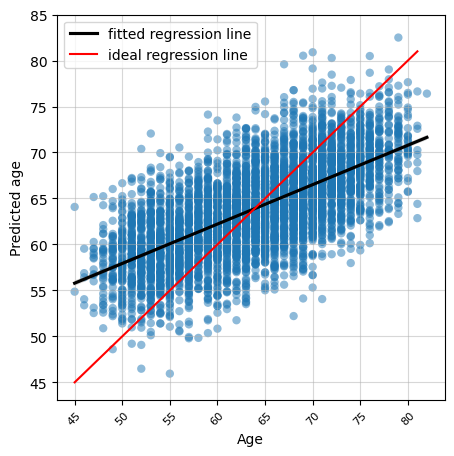

In [109]:
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['predicted_age_ridge'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='predicted_age_ridge',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(45,82)
axes.plot(x,y, color='#FF0000', linestyle='-', zorder=2, label='ideal regression line') 
axes.set(ylabel='Predicted age',
       yticks=[45,50,55,60,65,70,75,80,85], 
       xlabel='Age'
      )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='upper left')
axes.grid(alpha=0.5)
# plt.savefig(fig_path+'age_pred_age_ridge.pdf', bbox_inches='tight')
fig.show()

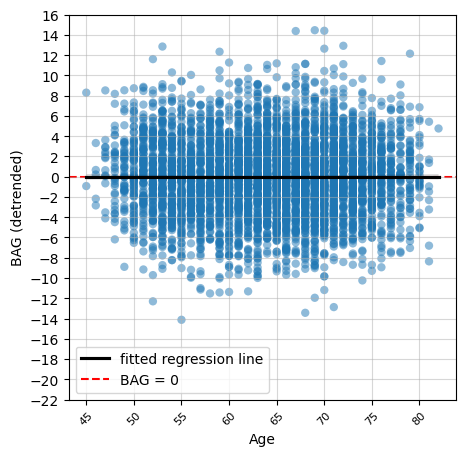

In [113]:
fig, axes = plt.subplots(1,figsize=(5, 5))
# bag plots
axes.scatter(data_overview_heldout['age'], data_overview_heldout['bag_ridge_detrended'],
             alpha=0.5, edgecolors='none')
sns.regplot(data=data_overview_heldout, x='age', y='bag_ridge_detrended',
            ax=axes, scatter=False, fit_reg=True, ci=95, color='black', label='fitted regression line')
x = np.arange(45,82)
y = np.arange(-22,17,2)
axes.axhline(y=0, color='#FF0000', linestyle='--', zorder=0, label='BAG = 0') #
axes.set(ylabel='BAG (detrended)',
        yticks=y,
        xlabel='Age'
        )
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(loc='lower left')
axes.grid(alpha=0.5)
# plt.savefig(fig_path+'age_detrended_BAG_ridge.pdf', bbox_inches='tight')
fig.show()

In [91]:
data_overview_heldout['bag_ridge_detrended'].min()

-14.125832951614829

In [92]:
data_overview_heldout['bag_ridge_detrended'].max()

14.456318861145952